Epoch 1/10
40/40 [==============================] - 40s 965ms/step - loss: 0.0844 - val_loss: 0.0670
Epoch 2/10
40/40 [==============================] - 38s 959ms/step - loss: 0.0633 - val_loss: 0.0503
Epoch 3/10
40/40 [==============================] - 37s 925ms/step - loss: 0.0363 - val_loss: 0.0161
Epoch 4/10
40/40 [==============================] - 37s 915ms/step - loss: 0.0179 - val_loss: 0.0114
Epoch 5/10
40/40 [==============================] - 37s 933ms/step - loss: 0.0149 - val_loss: 0.0093
Epoch 6/10
40/40 [==============================] - 39s 980ms/step - loss: 0.0135 - val_loss: 0.0087
Epoch 7/10
40/40 [==============================] - 41s 1s/step - loss: 0.0126 - val_loss: 0.0080
Epoch 8/10
40/40 [==============================] - 37s 932ms/step - loss: 0.0122 - val_loss: 0.0079
Epoch 9/10
40/40 [==============================] - 38s 959ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 10/10
13/13 [==============================] - 10s 724ms/step


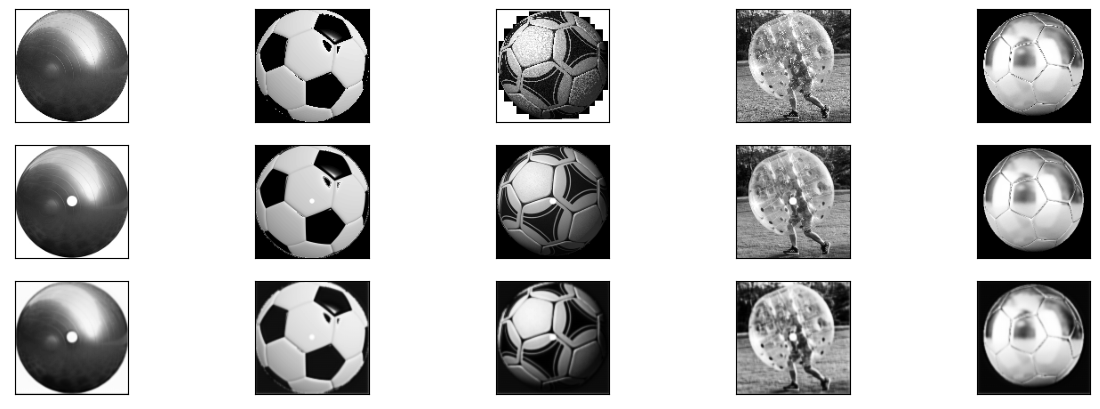

In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path):
    images = []
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            filepath = os.path.join(subdir, file)
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (128, 128)) / 255.0
            images.append(img[..., np.newaxis])
    return np.array(images)
def build_unet(input_shape=(128, 128, 1)):
    inputs = Input(input_shape)
    
    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    drop1 = Dropout(0.25)(pool1)

    # Bottleneck
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(drop1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    drop2 = Dropout(0.5)(conv2)

    # Decoder
    up1 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(drop2)
    merge1 = concatenate([conv1, up1], axis=3)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge1)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)
    
    outputs = Conv2D(1, (1, 1))(conv3)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
    
    return model


real_images_path = r'C:\Users\vermkas\Downloads\im\real'
defected_images_path = r'C:\Users\vermkas\Downloads\im\defected'

# Load the images
real_images = load_images_from_folder(real_images_path)
defected_images = load_images_from_folder(defected_images_path)

# Build the U-Net model
model = build_unet()

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
model.fit(defected_images, real_images, epochs=10, batch_size=8, validation_split=0.2, callbacks=[early_stopping])

# Use the model to repair the defected images
repaired_images = model.predict(defected_images)

# Visualization of the original, defected, and repaired images
n = 5  # Number of samples to display
plt.figure(figsize=(15, 5))
for i in range(n):
    # Display real images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(real_images[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display defected images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(defected_images[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display repaired images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(repaired_images[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [13]:
def build_unet(input_shape=(128, 128, 1)):
    inputs = Input(input_shape)
    
    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv11 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)

    # Bottleneck
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool11)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
   

    # Decoder
    up1 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(conv2)
  
    merge1 = concatenate([conv11, up1])
    
    up2 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(merge1)
    merge2 = concatenate([conv1, up2], axis=3)
    
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge2)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)
    
    outputs = Conv2D(1, (1, 1))(conv3)
    
    model = Model(inputs=inputs, outputs=outputs)
    #model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
    
    return model
m = build_unet()
m.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_70 (Conv2D)             (None, 128, 128, 32  320         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 128, 128, 32  9248        ['conv2d_70[0][0]']              
                                )                                                           

In [14]:
import tensorflow as tf
def residualblock(input_layer):
    # conv lyaer 
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    return tf.kerass.layers.Add()([input_layer,x])